In [1]:
import pandas as pd
import numpy as np 
from pandas_datareader import data as web

In [2]:
import matplotlib.pyplot as plt
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs
import cufflinks as cf
import seaborn as sns

In [3]:
cf.go_offline()
init_notebook_mode(connected=False)

In [4]:
tickers = ["AMZN","GIVN.SW", "4914.T", 'MDLZ']
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source="yahoo", start ="2013-1-4")["Adj Close"]

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal



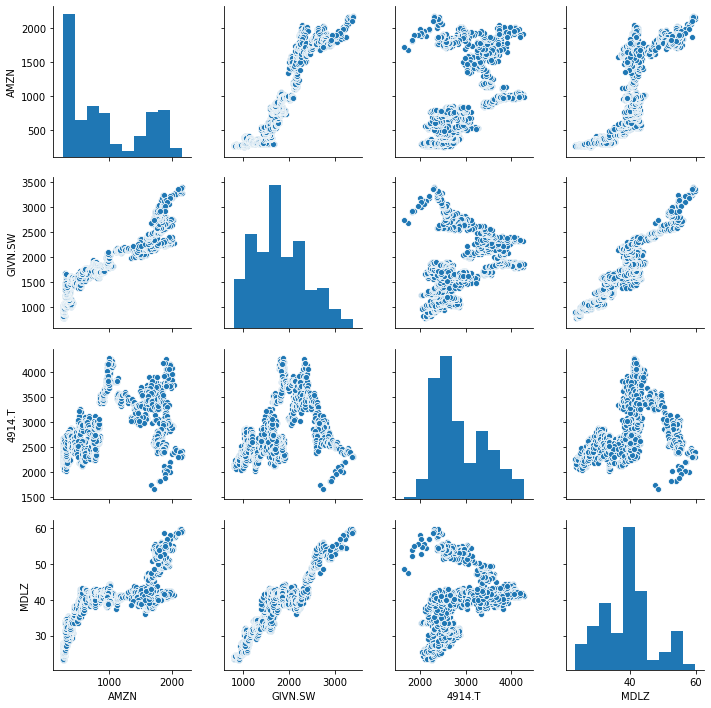

In [5]:
sns.pairplot(data)

In [6]:
data.corr()

AMZN   GIVN.SW    4914.T      MDLZ
AMZN     1.000000  0.935531  0.528831  0.832009
GIVN.SW  0.935531  1.000000  0.398578  0.929846
4914.T   0.528831  0.398578  1.000000  0.329375
MDLZ     0.832009  0.929846  0.329375  1.000000

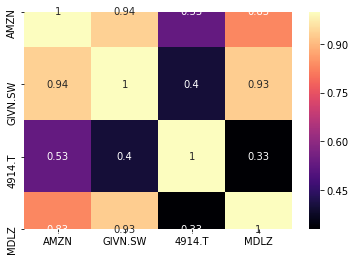

In [7]:
sns.heatmap(data.corr(), annot=True, cmap="magma")

## Cumulative returns

In [8]:
for t in tickers:
    data[f"{t} normal returns"] = data[f"{t}"]/data[f"{t}"].iloc[0]

In [9]:
data.tail()

AMZN  GIVN.SW  4914.T       MDLZ  AMZN normal returns  \
Date                                                                       
2020-03-09  1800.609985   2897.0  1823.0  53.939999             6.948138   
2020-03-10  1891.819946   2927.0  1878.0  54.910000             7.300096   
2020-03-11  1820.859985   2912.0  1827.0  52.340000             7.026278   
2020-03-12  1676.609985   2681.0  1741.0  47.509998             6.469651   
2020-03-13  1720.000000   2745.0  1664.0  48.480000             6.637083   

            GIVN.SW normal returns  4914.T normal returns  MDLZ normal returns  
Date                                                                            
2020-03-09                3.642245               0.860826             2.304953  
2020-03-10                3.679963               0.886798             2.346403  
2020-03-11                3.661104               0.862715             2.236582  
2020-03-12                3.370680               0.822106             2.030187  
2020-03-13                3.451144               0.785746             2.071637

In [10]:
data.columns

Index(['AMZN', 'GIVN.SW', '4914.T', 'MDLZ', 'AMZN normal returns',
       'GIVN.SW normal returns', '4914.T normal returns',
       'MDLZ normal returns'],
      dtype='object')

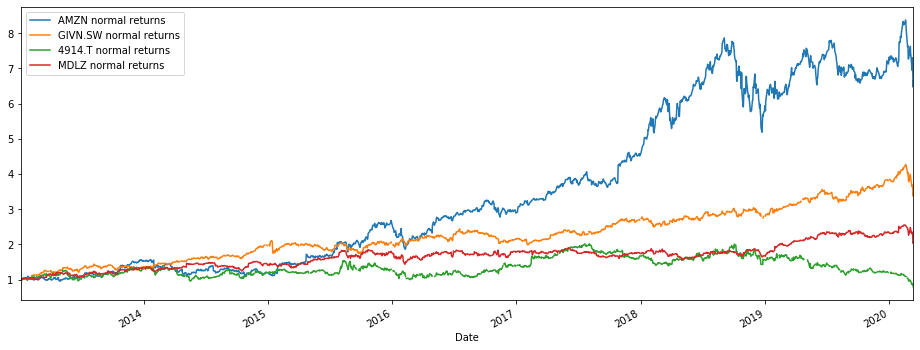

In [11]:
data[['AMZN normal returns', 'GIVN.SW normal returns', '4914.T normal returns','MDLZ normal returns']].plot(figsize = (16,6))

## Allocations

In [12]:
weights = [0.3,0.4,0.2,0.1]
for stock, weight in zip(tickers,weights):
    data[f"{stock} allocation"] = data[f"{stock} normal returns"] * weight

In [13]:
data.head()

AMZN     GIVN.SW       4914.T       MDLZ  \
Date                                                         
2013-01-04  259.149994  795.388489  2117.732422  23.401779   
2013-01-07  268.459991  789.680908  2122.355957  23.331776   
2013-01-08  266.380005  788.865540  2103.860352  23.349285   
2013-01-09  266.350006  797.834656  2150.099365  23.673088   
2013-01-10  265.339996  798.242249  2159.347900  23.900631   

            AMZN normal returns  GIVN.SW normal returns  \
Date                                                      
2013-01-04             1.000000                1.000000   
2013-01-07             1.035925                0.992824   
2013-01-08             1.027899                0.991799   
2013-01-09             1.027783                1.003075   
2013-01-10             1.023886                1.003588   

            4914.T normal returns  MDLZ normal returns  AMZN allocation  \
Date                                                                      
2013-01-04               1.000000             1.000000         0.300000   
2013-01-07               1.002183             0.997009         0.310778   
2013-01-08               0.993450             0.997757         0.308370   
2013-01-09               1.015284             1.011594         0.308335   
2013-01-10               1.019651             1.021317         0.307166   

            GIVN.SW allocation  4914.T allocation  MDLZ allocation  
Date                                                                
2013-01-04            0.400000           0.200000         0.100000  
2013-01-07            0.397130           0.200437         0.099701  
2013-01-08            0.396720           0.198690         0.099776  
2013-01-09            0.401230           0.203057         0.101159  
2013-01-10            0.401435           0.203930         0.102132

### Position

In [14]:
for t in tickers:
    data[f"{t} pos"] = data[f"{t} allocation"] * 100000

In [15]:
data.head()

AMZN     GIVN.SW       4914.T       MDLZ  \
Date                                                         
2013-01-04  259.149994  795.388489  2117.732422  23.401779   
2013-01-07  268.459991  789.680908  2122.355957  23.331776   
2013-01-08  266.380005  788.865540  2103.860352  23.349285   
2013-01-09  266.350006  797.834656  2150.099365  23.673088   
2013-01-10  265.339996  798.242249  2159.347900  23.900631   

            AMZN normal returns  GIVN.SW normal returns  \
Date                                                      
2013-01-04             1.000000                1.000000   
2013-01-07             1.035925                0.992824   
2013-01-08             1.027899                0.991799   
2013-01-09             1.027783                1.003075   
2013-01-10             1.023886                1.003588   

            4914.T normal returns  MDLZ normal returns  AMZN allocation  \
Date                                                                      
2013-01-04               1.000000             1.000000         0.300000   
2013-01-07               1.002183             0.997009         0.310778   
2013-01-08               0.993450             0.997757         0.308370   
2013-01-09               1.015284             1.011594         0.308335   
2013-01-10               1.019651             1.021317         0.307166   

            GIVN.SW allocation  4914.T allocation  MDLZ allocation  \
Date                                                                 
2013-01-04            0.400000           0.200000         0.100000   
2013-01-07            0.397130           0.200437         0.099701   
2013-01-08            0.396720           0.198690         0.099776   
2013-01-09            0.401230           0.203057         0.101159   
2013-01-10            0.401435           0.203930         0.102132   

                AMZN pos   GIVN.SW pos    4914.T pos      MDLZ pos  
Date                                                                
2013-01-04  30000.000000  40000.000000  20000.000000  10000.000000  
2013-01-07  31077.753939  39712.966398  20043.664961   9970.086245  
2013-01-08  30836.968299  39671.961598  19868.991284   9977.568351  
2013-01-09  30833.495548  40123.017470  20305.675477  10115.935159  
2013-01-10  30716.573713  40143.515266  20393.019232  10213.168312

In [16]:
data.columns

Index(['AMZN', 'GIVN.SW', '4914.T', 'MDLZ', 'AMZN normal returns',
       'GIVN.SW normal returns', '4914.T normal returns',
       'MDLZ normal returns', 'AMZN allocation', 'GIVN.SW allocation',
       '4914.T allocation', 'MDLZ allocation', 'AMZN pos', 'GIVN.SW pos',
       '4914.T pos', 'MDLZ pos'],
      dtype='object')

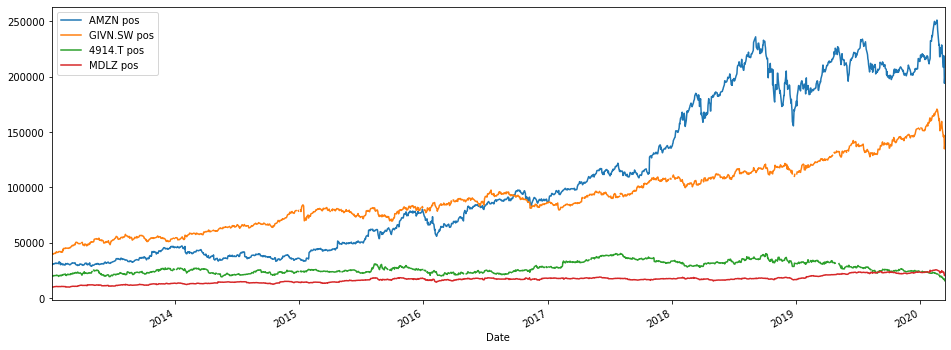

In [17]:
data[['AMZN pos', 'GIVN.SW pos',
       '4914.T pos', 'MDLZ pos']].plot(figsize = (16,6))

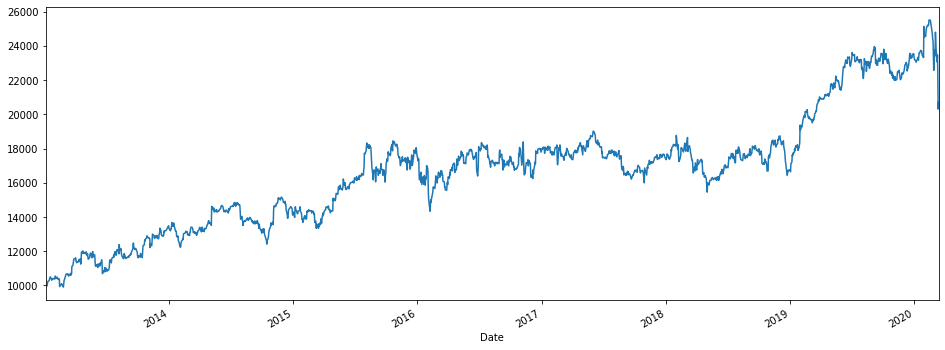

In [18]:
data["MDLZ pos"].plot(figsize = (16,6))

### Totoal pos

In [19]:
data["Tota Pos"] = data[['AMZN pos', 'GIVN.SW pos','4914.T pos', 'MDLZ pos']].sum(axis = 1)

In [20]:
data["Tota Pos"].iplot()

## Daily returns

In [21]:
data["Daily Returns"] = data["Tota Pos"].pct_change()

In [22]:
data.head()

AMZN     GIVN.SW       4914.T       MDLZ  \
Date                                                         
2013-01-04  259.149994  795.388489  2117.732422  23.401779   
2013-01-07  268.459991  789.680908  2122.355957  23.331776   
2013-01-08  266.380005  788.865540  2103.860352  23.349285   
2013-01-09  266.350006  797.834656  2150.099365  23.673088   
2013-01-10  265.339996  798.242249  2159.347900  23.900631   

            AMZN normal returns  GIVN.SW normal returns  \
Date                                                      
2013-01-04             1.000000                1.000000   
2013-01-07             1.035925                0.992824   
2013-01-08             1.027899                0.991799   
2013-01-09             1.027783                1.003075   
2013-01-10             1.023886                1.003588   

            4914.T normal returns  MDLZ normal returns  AMZN allocation  \
Date                                                                      
2013-01-04               1.000000             1.000000         0.300000   
2013-01-07               1.002183             0.997009         0.310778   
2013-01-08               0.993450             0.997757         0.308370   
2013-01-09               1.015284             1.011594         0.308335   
2013-01-10               1.019651             1.021317         0.307166   

            GIVN.SW allocation  4914.T allocation  MDLZ allocation  \
Date                                                                 
2013-01-04            0.400000           0.200000         0.100000   
2013-01-07            0.397130           0.200437         0.099701   
2013-01-08            0.396720           0.198690         0.099776   
2013-01-09            0.401230           0.203057         0.101159   
2013-01-10            0.401435           0.203930         0.102132   

                AMZN pos   GIVN.SW pos    4914.T pos      MDLZ pos  \
Date                                                                 
2013-01-04  30000.000000  40000.000000  20000.000000  10000.000000   
2013-01-07  31077.753939  39712.966398  20043.664961   9970.086245   
2013-01-08  30836.968299  39671.961598  19868.991284   9977.568351   
2013-01-09  30833.495548  40123.017470  20305.675477  10115.935159   
2013-01-10  30716.573713  40143.515266  20393.019232  10213.168312   

                 Tota Pos  Daily Returns  
Date                                      
2013-01-04  100000.000000            NaN  
2013-01-07  100804.471543       0.008045  
2013-01-08  100355.489532      -0.004454  
2013-01-09  101378.123654       0.010190  
2013-01-10  101466.276523       0.000870

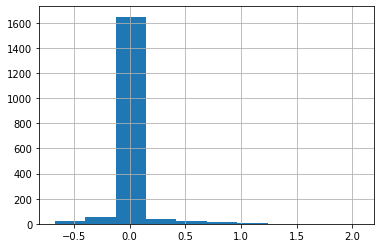

In [23]:
data["Daily Returns"].hist(bins = 10)

In [24]:
daily_Returns = data["Daily Returns"]

In [25]:
port_Volitility = daily_Returns.std()

In [26]:
port_Volitility

0.14307100374006598

In [27]:
sr = (daily_Returns.mean()/port_Volitility) * np.sqrt(252)

In [28]:
sr

1.0262366094949058

## Random Allocaitions

In [29]:
data.columns

Index(['AMZN', 'GIVN.SW', '4914.T', 'MDLZ', 'AMZN normal returns',
       'GIVN.SW normal returns', '4914.T normal returns',
       'MDLZ normal returns', 'AMZN allocation', 'GIVN.SW allocation',
       '4914.T allocation', 'MDLZ allocation', 'AMZN pos', 'GIVN.SW pos',
       '4914.T pos', 'MDLZ pos', 'Tota Pos', 'Daily Returns'],
      dtype='object')

In [30]:
stocks = data[['AMZN', 'GIVN.SW', '4914.T', 'MDLZ']]

In [31]:
number_of_port = 4000
all_weights = np.zeros((number_of_port, len(stocks.columns)))
all_returns = np.zeros(number_of_port)
all_vol = np.zeros(number_of_port)
all_sharp = np.zeros(number_of_port)

for ind in range(number_of_port):
    weights = np.array(np.random.random(4))
    weights = weights/weights.sum()
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(stocks.pct_change().mean() * weights) * 252
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(stocks.pct_change().cov() * 252, weights)))
    all_sharp[ind] = all_returns[ind]/all_vol[ind]

In [32]:
max_sharp = all_sharp.argmax()

In [33]:
max_return = all_returns.argmax()

In [34]:
lowest_risk = all_vol.argmin()

In [35]:
all_weights[max_return]

array([0.82336822, 0.166195  , 0.00516445, 0.00527232])

Text(0, 0.5, 'Returns')

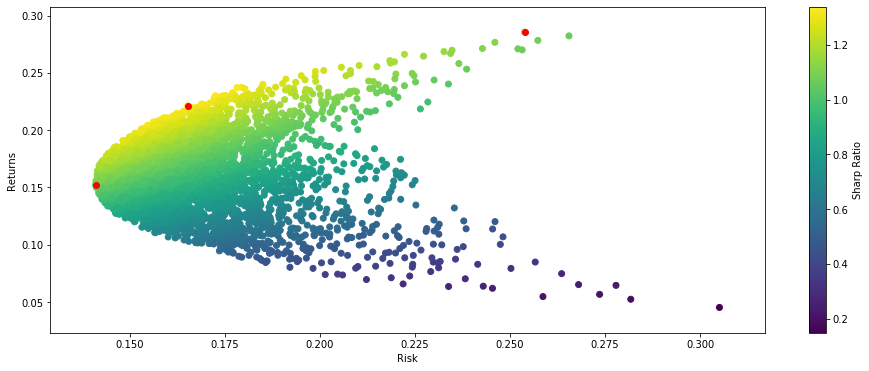

In [36]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol,all_returns, c= all_sharp)
plt.colorbar(label = "Sharp Ratio")
plt.scatter(all_vol[max_sharp],all_returns[max_sharp], c= "red")
plt.scatter(all_vol[max_return],all_returns[max_return], c= "red")
plt.scatter(all_vol[lowest_risk],all_returns[lowest_risk], c= "red")
plt.xlabel("Risk")
plt.ylabel("Returns")

### MAthmatical

In [37]:
def ret_vol_shp(weights):
    weii = np.array(weights)
    ret = np.sum(stocks.pct_change().mean() *weii) * 252
    vol = np.sqrt(np.dot(weii.T, np.dot(stocks.pct_change().cov() * 252, weii)))
    shp = ret/vol
    return np.array([ret,vol,shp])

## helper function

In [38]:
def minimi_sharp(weights):
    return ret_vol_shp(weights)[2] * -1

In [39]:
def check_sum(weights):
    return np.sum(weights) - 1

In [40]:
constr = {"type":"eq","fun":check_sum}

In [41]:
bounds = ((0,1),) * len(stocks.columns)
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [42]:
initial_Guess = [0.25] * len(stocks.columns)
initial_Guess

[0.25, 0.25, 0.25, 0.25]

In [43]:
from scipy.optimize import minimize

In [44]:
best_results = minimize(minimi_sharp,initial_Guess, method="SLSQP",bounds=bounds, constraints=constr)

In [45]:
best_results

     fun: -1.3402312556077196
     jac: array([ 1.19626522e-04, -1.15931034e-04,  1.60369113e-01,  2.77653337e-04])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.33752565, 0.56995496, 0.        , 0.09251939])

In [46]:
ret_vol_shp(best_results.x)

array([0.22305811, 0.16643256, 1.34023126])

## fficient frontier

In [47]:
frontier_y = np.linspace(0.05,0.3,200)

In [48]:
def min_vol(weights):
    return ret_vol_shp(weights)[1]

In [49]:
frontier_vol = []

In [50]:
for pos_return in frontier_y:
    con = ({"type":"eq", "fun": check_sum}, {"type":"eq", "fun": lambda w: ret_vol_shp(w)[0] - pos_return})
    result = minimize(min_vol, initial_Guess, method="SLSQP", bounds=bounds, constraints=con)
    frontier_vol.append(result["fun"])

Text(0, 0.5, 'Returns')

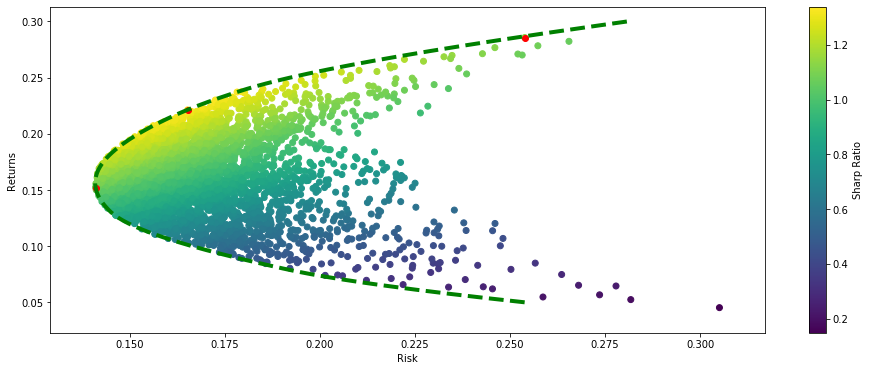

In [51]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol,all_returns, c= all_sharp)
plt.colorbar(label = "Sharp Ratio")
plt.scatter(all_vol[max_sharp],all_returns[max_sharp], c= "red")
plt.scatter(all_vol[max_return],all_returns[max_return], c= "red")
plt.scatter(all_vol[lowest_risk],all_returns[lowest_risk], c= "red")
plt.plot(frontier_vol, frontier_y, "g--",lw = 4)
plt.xlabel("Risk")
plt.ylabel("Returns")